In [8]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

In [9]:
import os
from models.CNNs import CNNs
from datasets.SPCUP22MelDataModule import SPCUP22MelDataModule

In [10]:
from utils.metrics import (
    plot_classification_report,
    pytorch_lightning_make_predictions as make_predictions,
    print_scores
)

In [11]:
hparams = {
    "network": "ResNet34",
}

checkpoint = CNNs.load_from_checkpoint(
    str(ROOT.joinpath("resnet34_on_train_dataset","last.ckpt")),
    **hparams,
)

data_module = SPCUP22MelDataModule(
        64,
        dataset_root=pathlib.Path(ROOT.joinpath("data","spcup22")).absolute(),
        config_file_path=str(ROOT.joinpath("config","mel_feature.yaml")),
        should_include_augmented_data=False,
        num_workers=8,
    )

In [12]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module,
);

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_eval_part2_mel_features.zip]...


/home/rafatmating/anaconda3/envs/spcup/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1584: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

/home/rafatmating/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [13]:
print_scores(actual_labels, predictions)


    F1 Score: 0.78
    Accuracy: 0.78
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


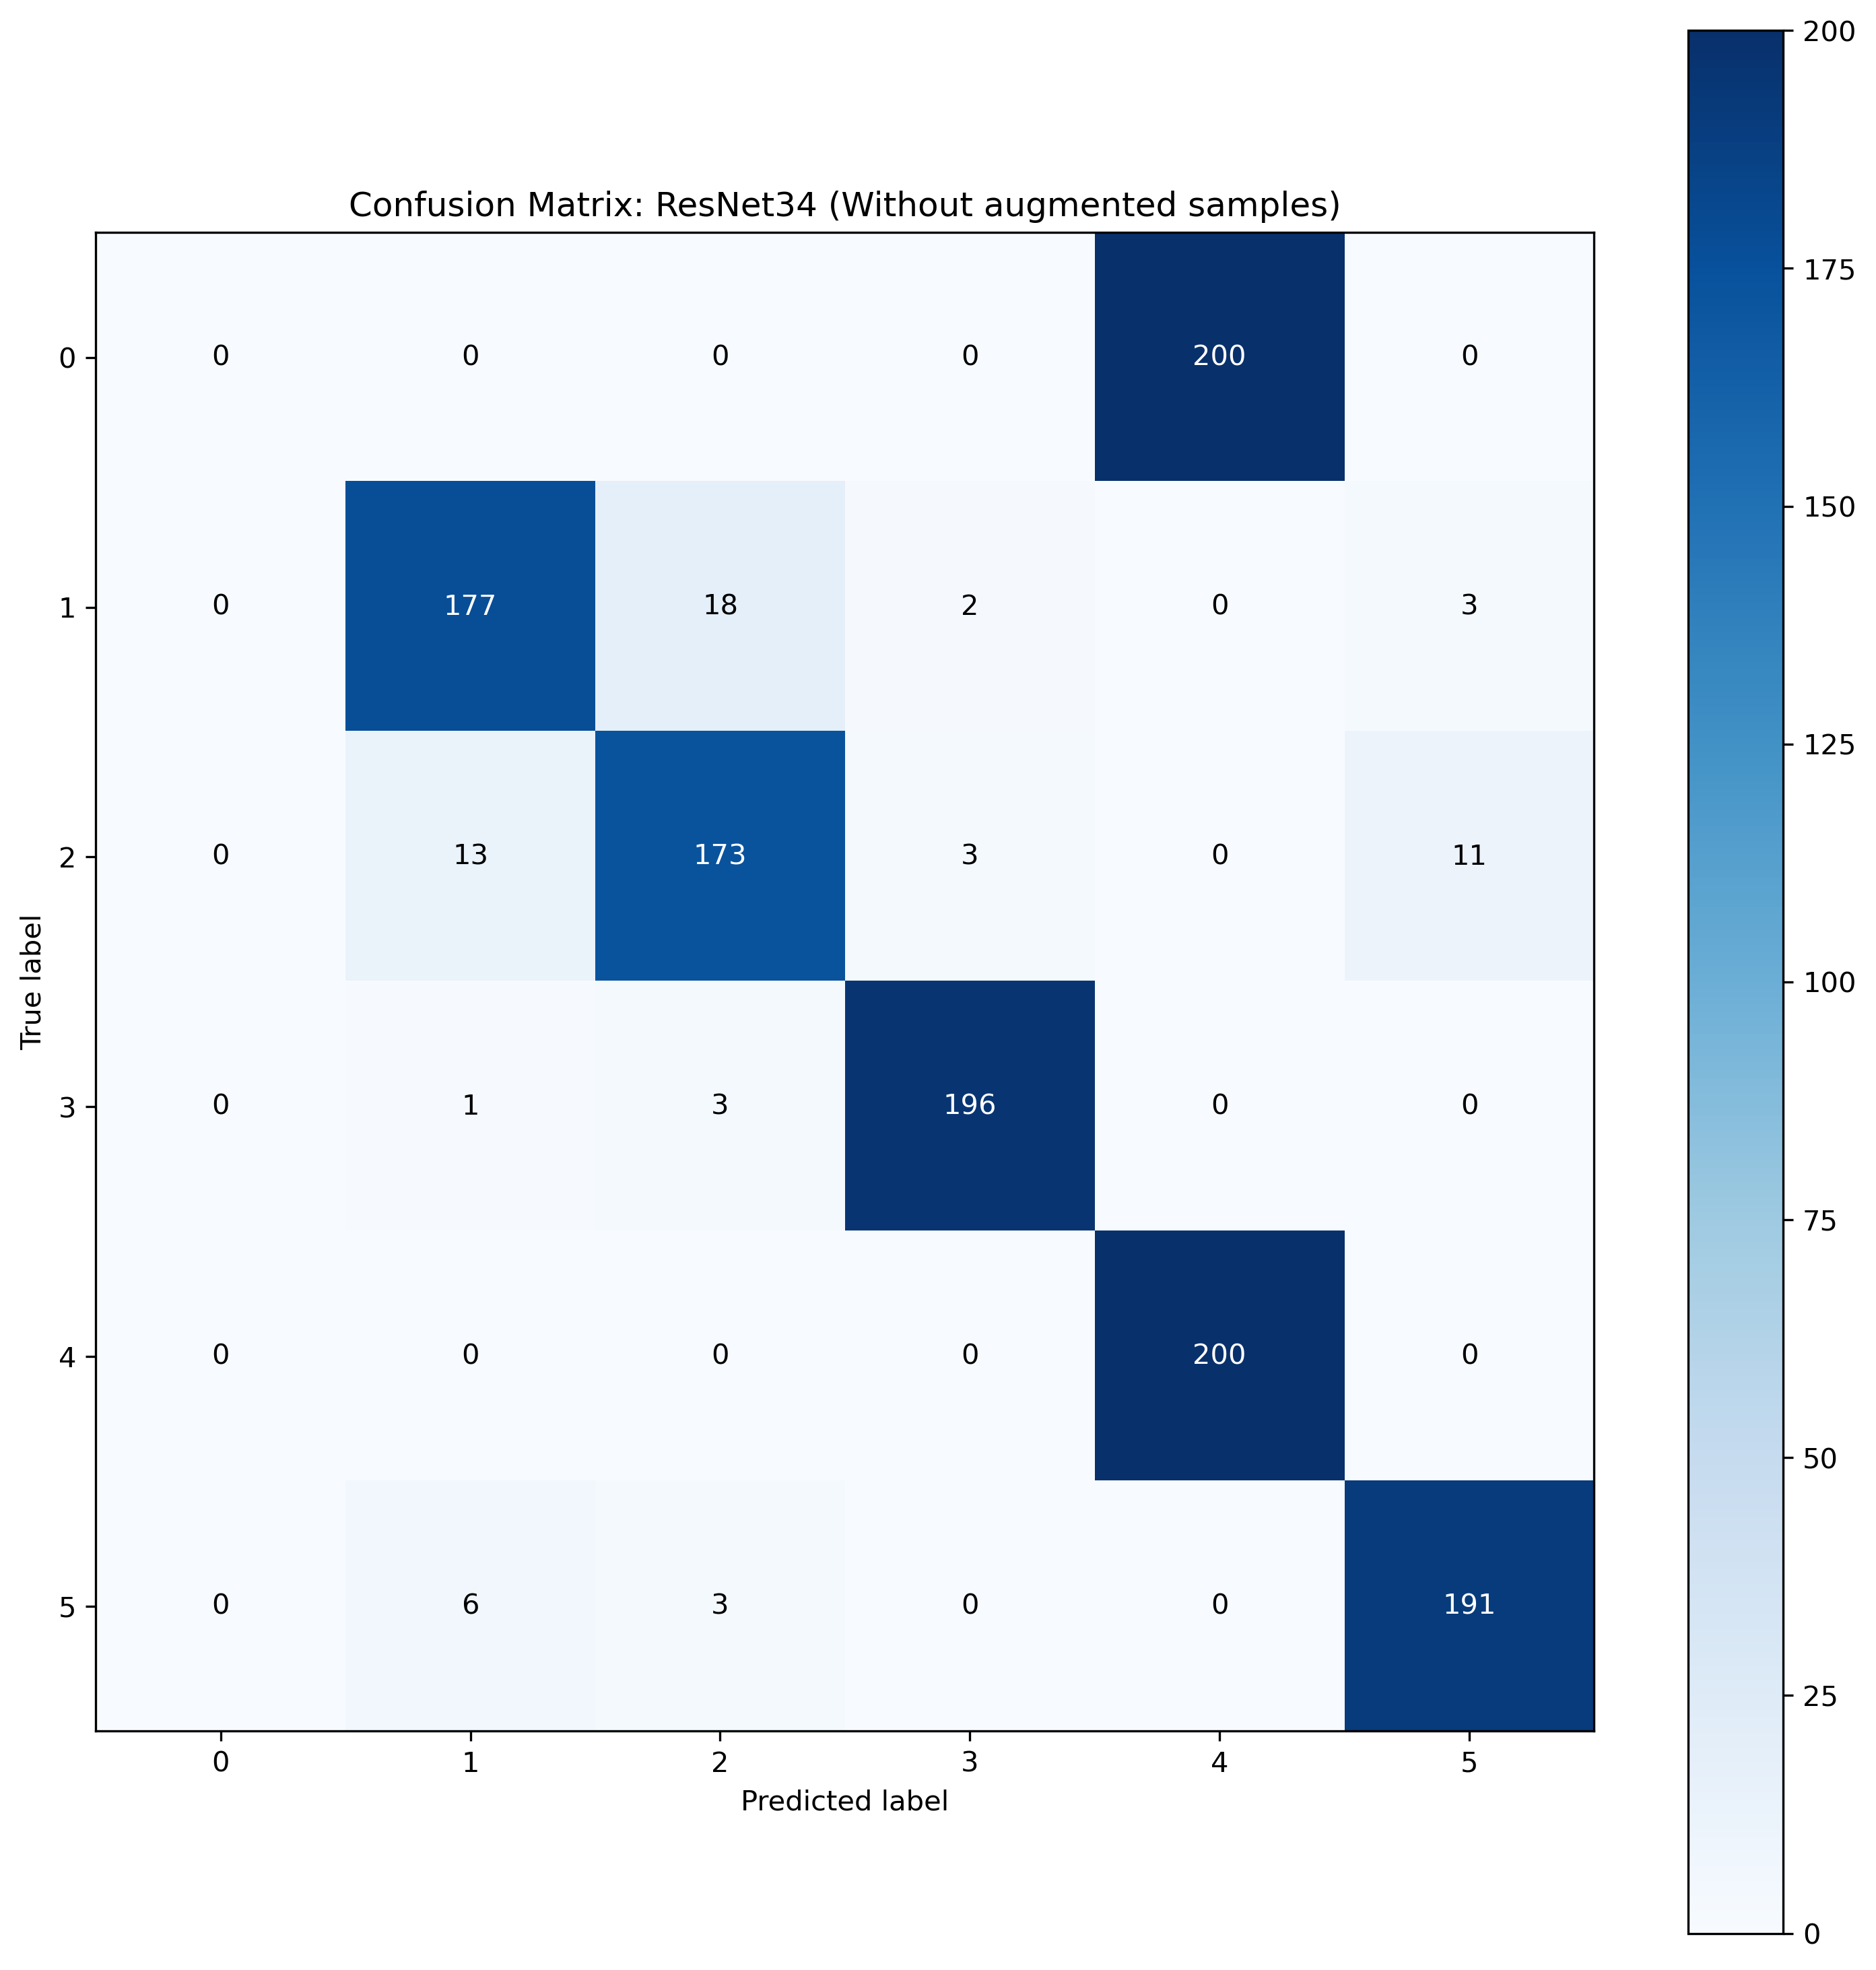

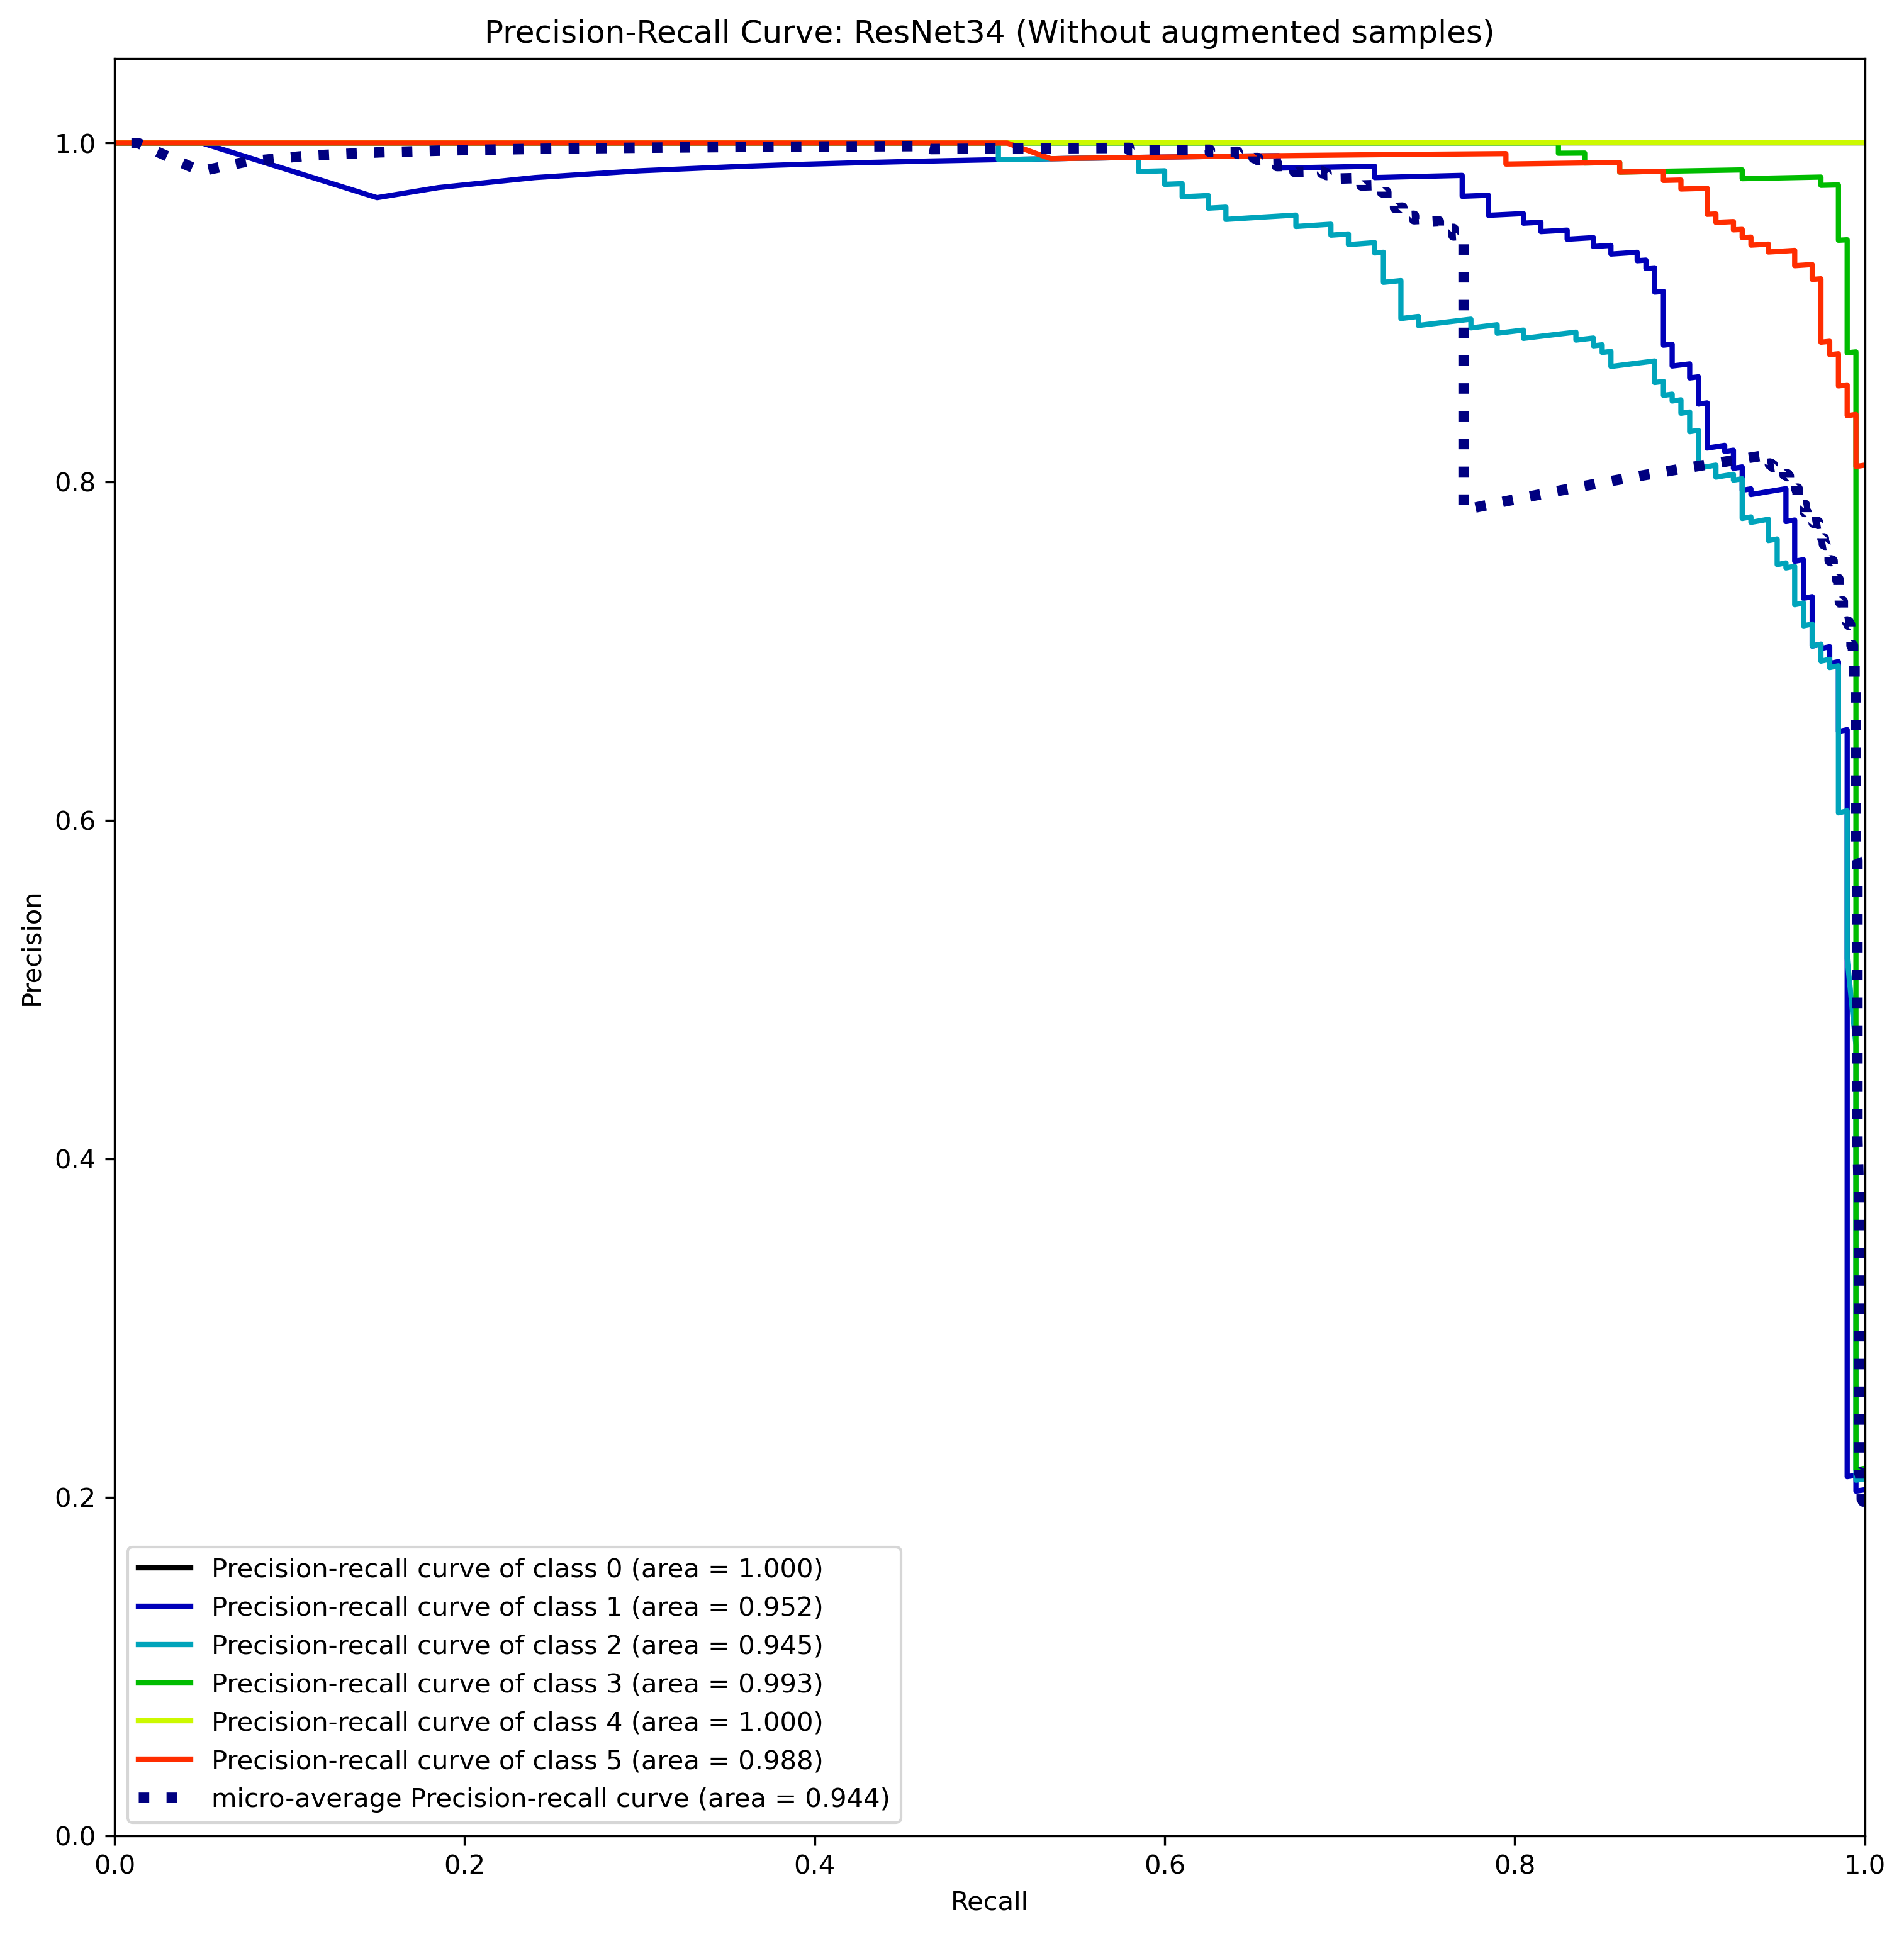

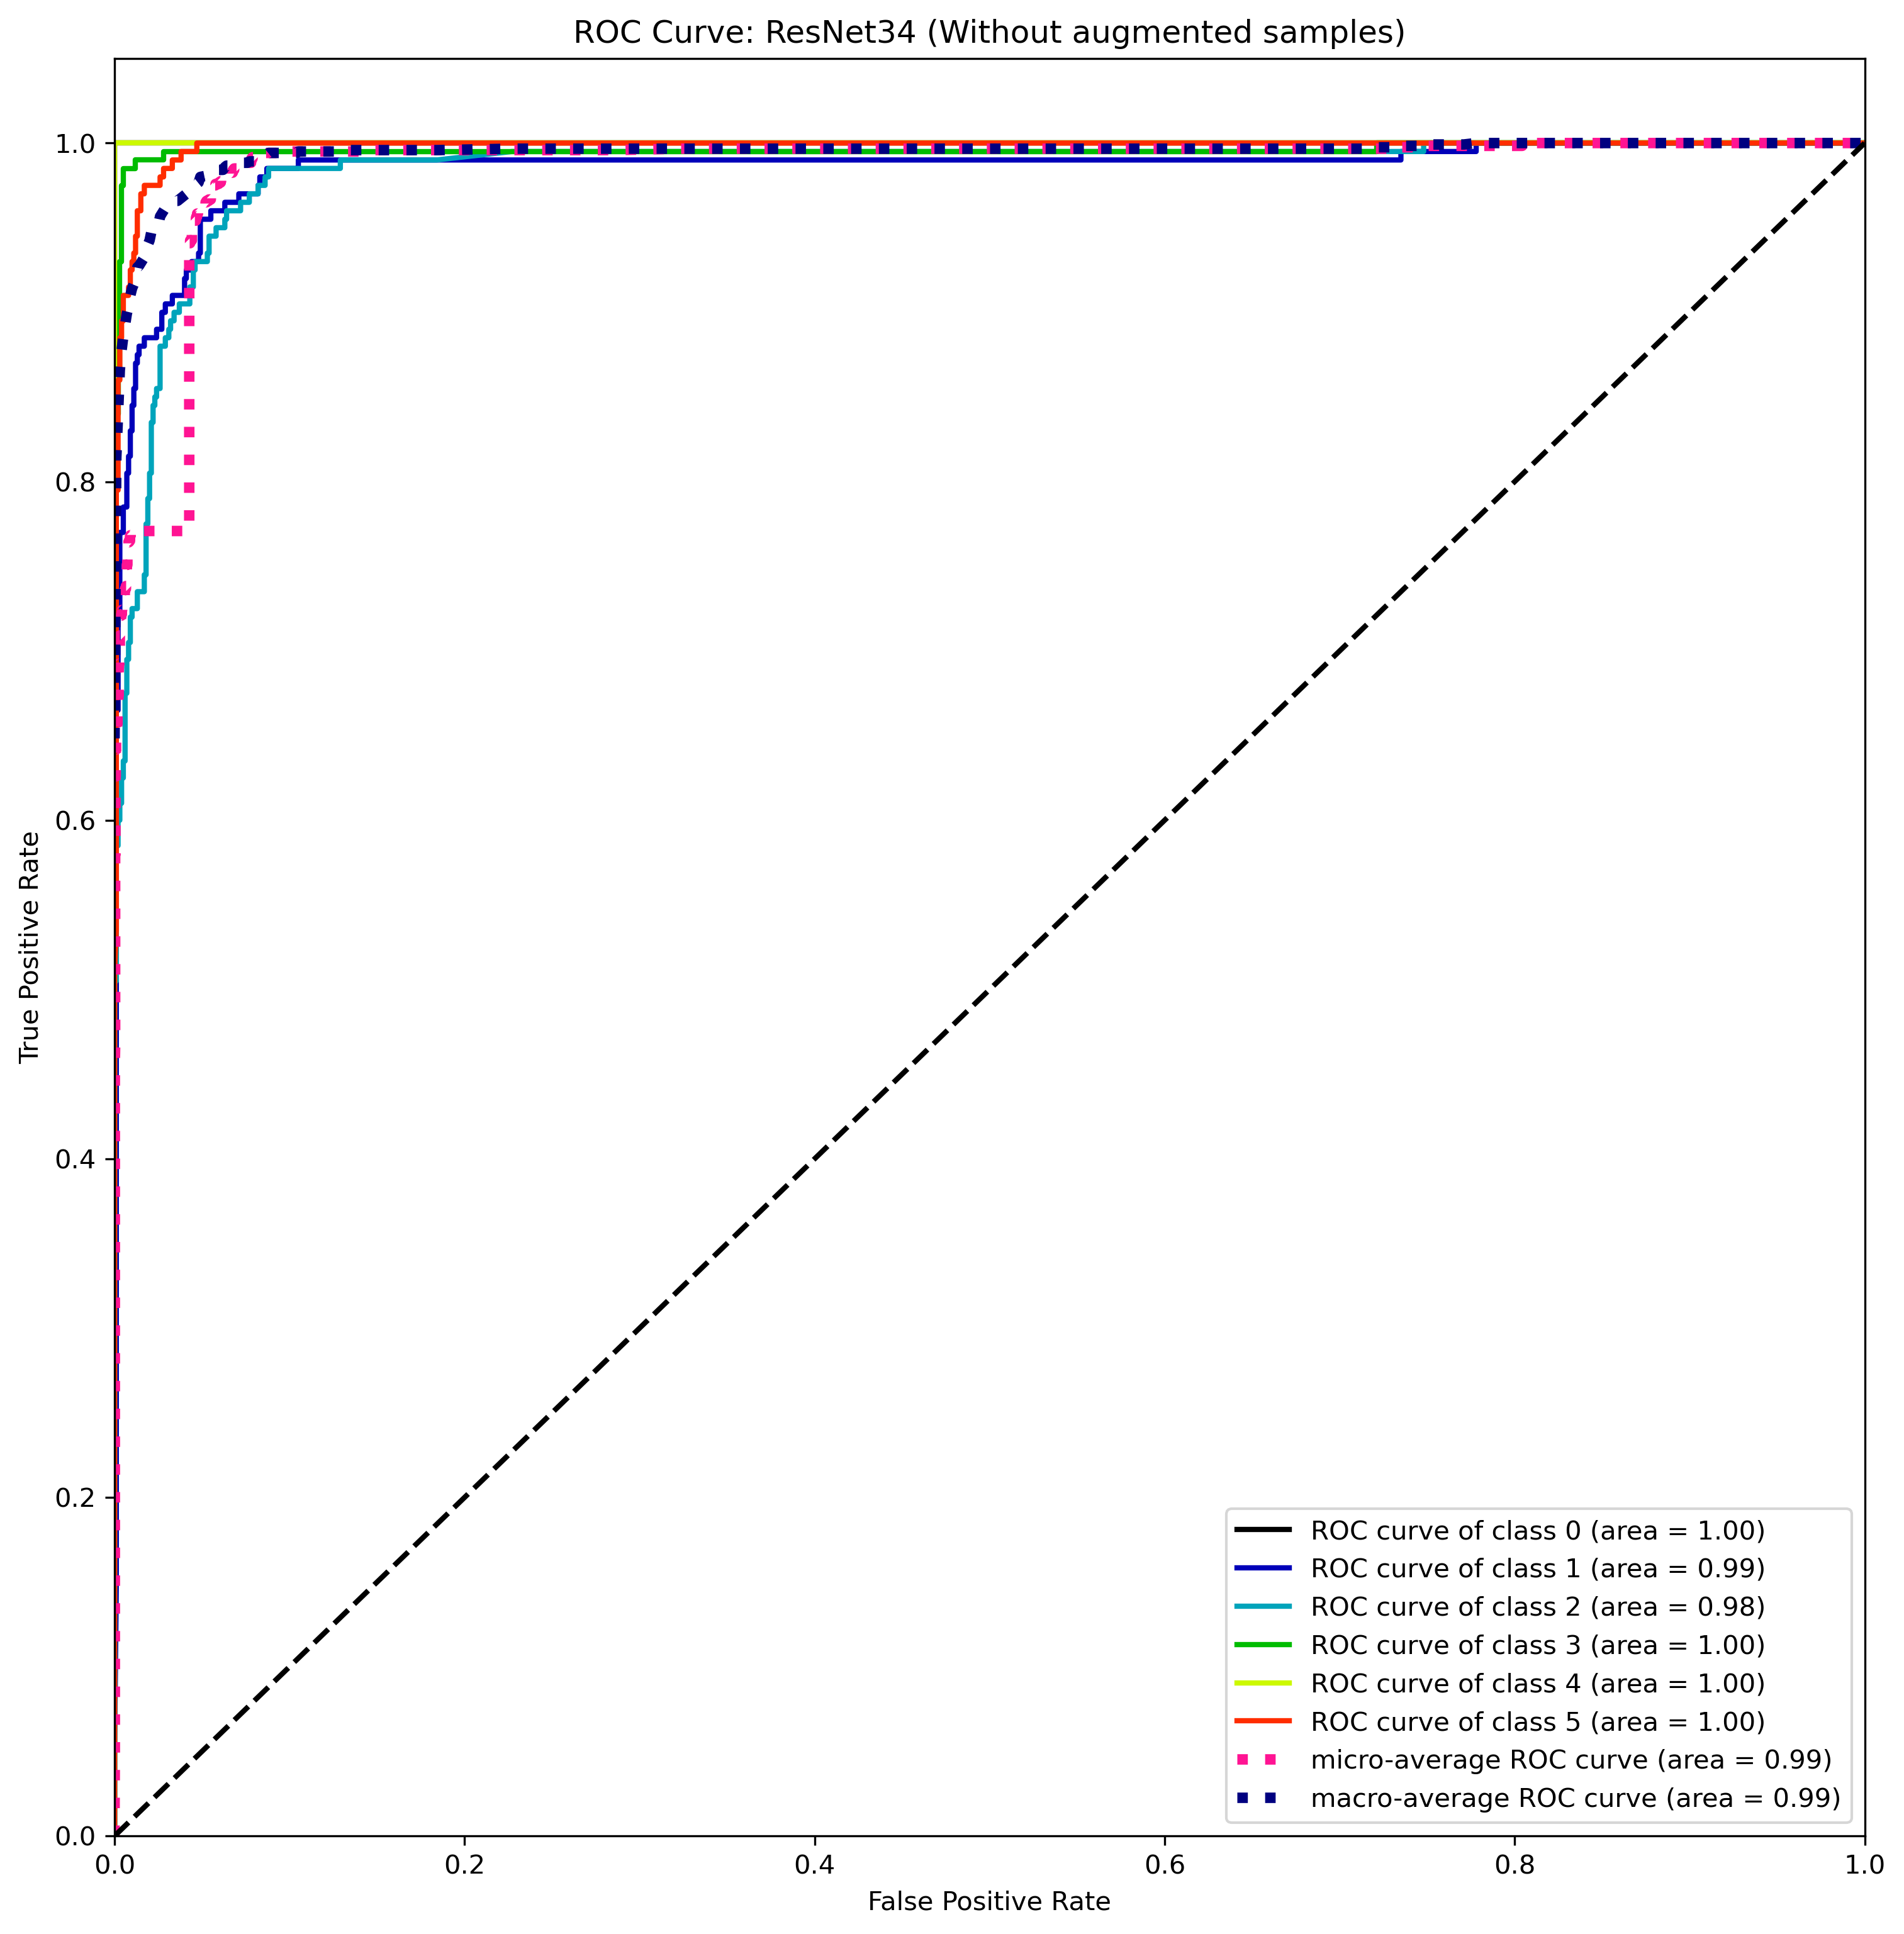

In [14]:
fig_save_path = str(ROOT.joinpath("results", "resnet34", "without_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="ResNet34 (Without augmented samples)",
    save_path=fig_save_path
)

In [4]:
hparams = {
    "network": "ResNet34",
}

checkpoint = CNNs.load_from_checkpoint(
    str(ROOT.joinpath("resnet34_on_train_dataset_augmented","last.ckpt")),
    **hparams,
)
data_module = SPCUP22MelDataModule(
        64,
        dataset_root=pathlib.Path(ROOT.joinpath("data","spcup22")).absolute(),
        config_file_path=str(ROOT.joinpath("config","mel_feature.yaml")),
        should_include_augmented_data=True,
        num_workers=8,
    )

In [5]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/spcup22/spcup_2022_eval_part2_mel_features.zip]...


/home/rafatmating/anaconda3/envs/spcup/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1584: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

/home/rafatmating/SPCUP2022/utils/metrics.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [6]:
print_scores(actual_labels, predictions)


    F1 Score: 0.97
    Accuracy: 0.97
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


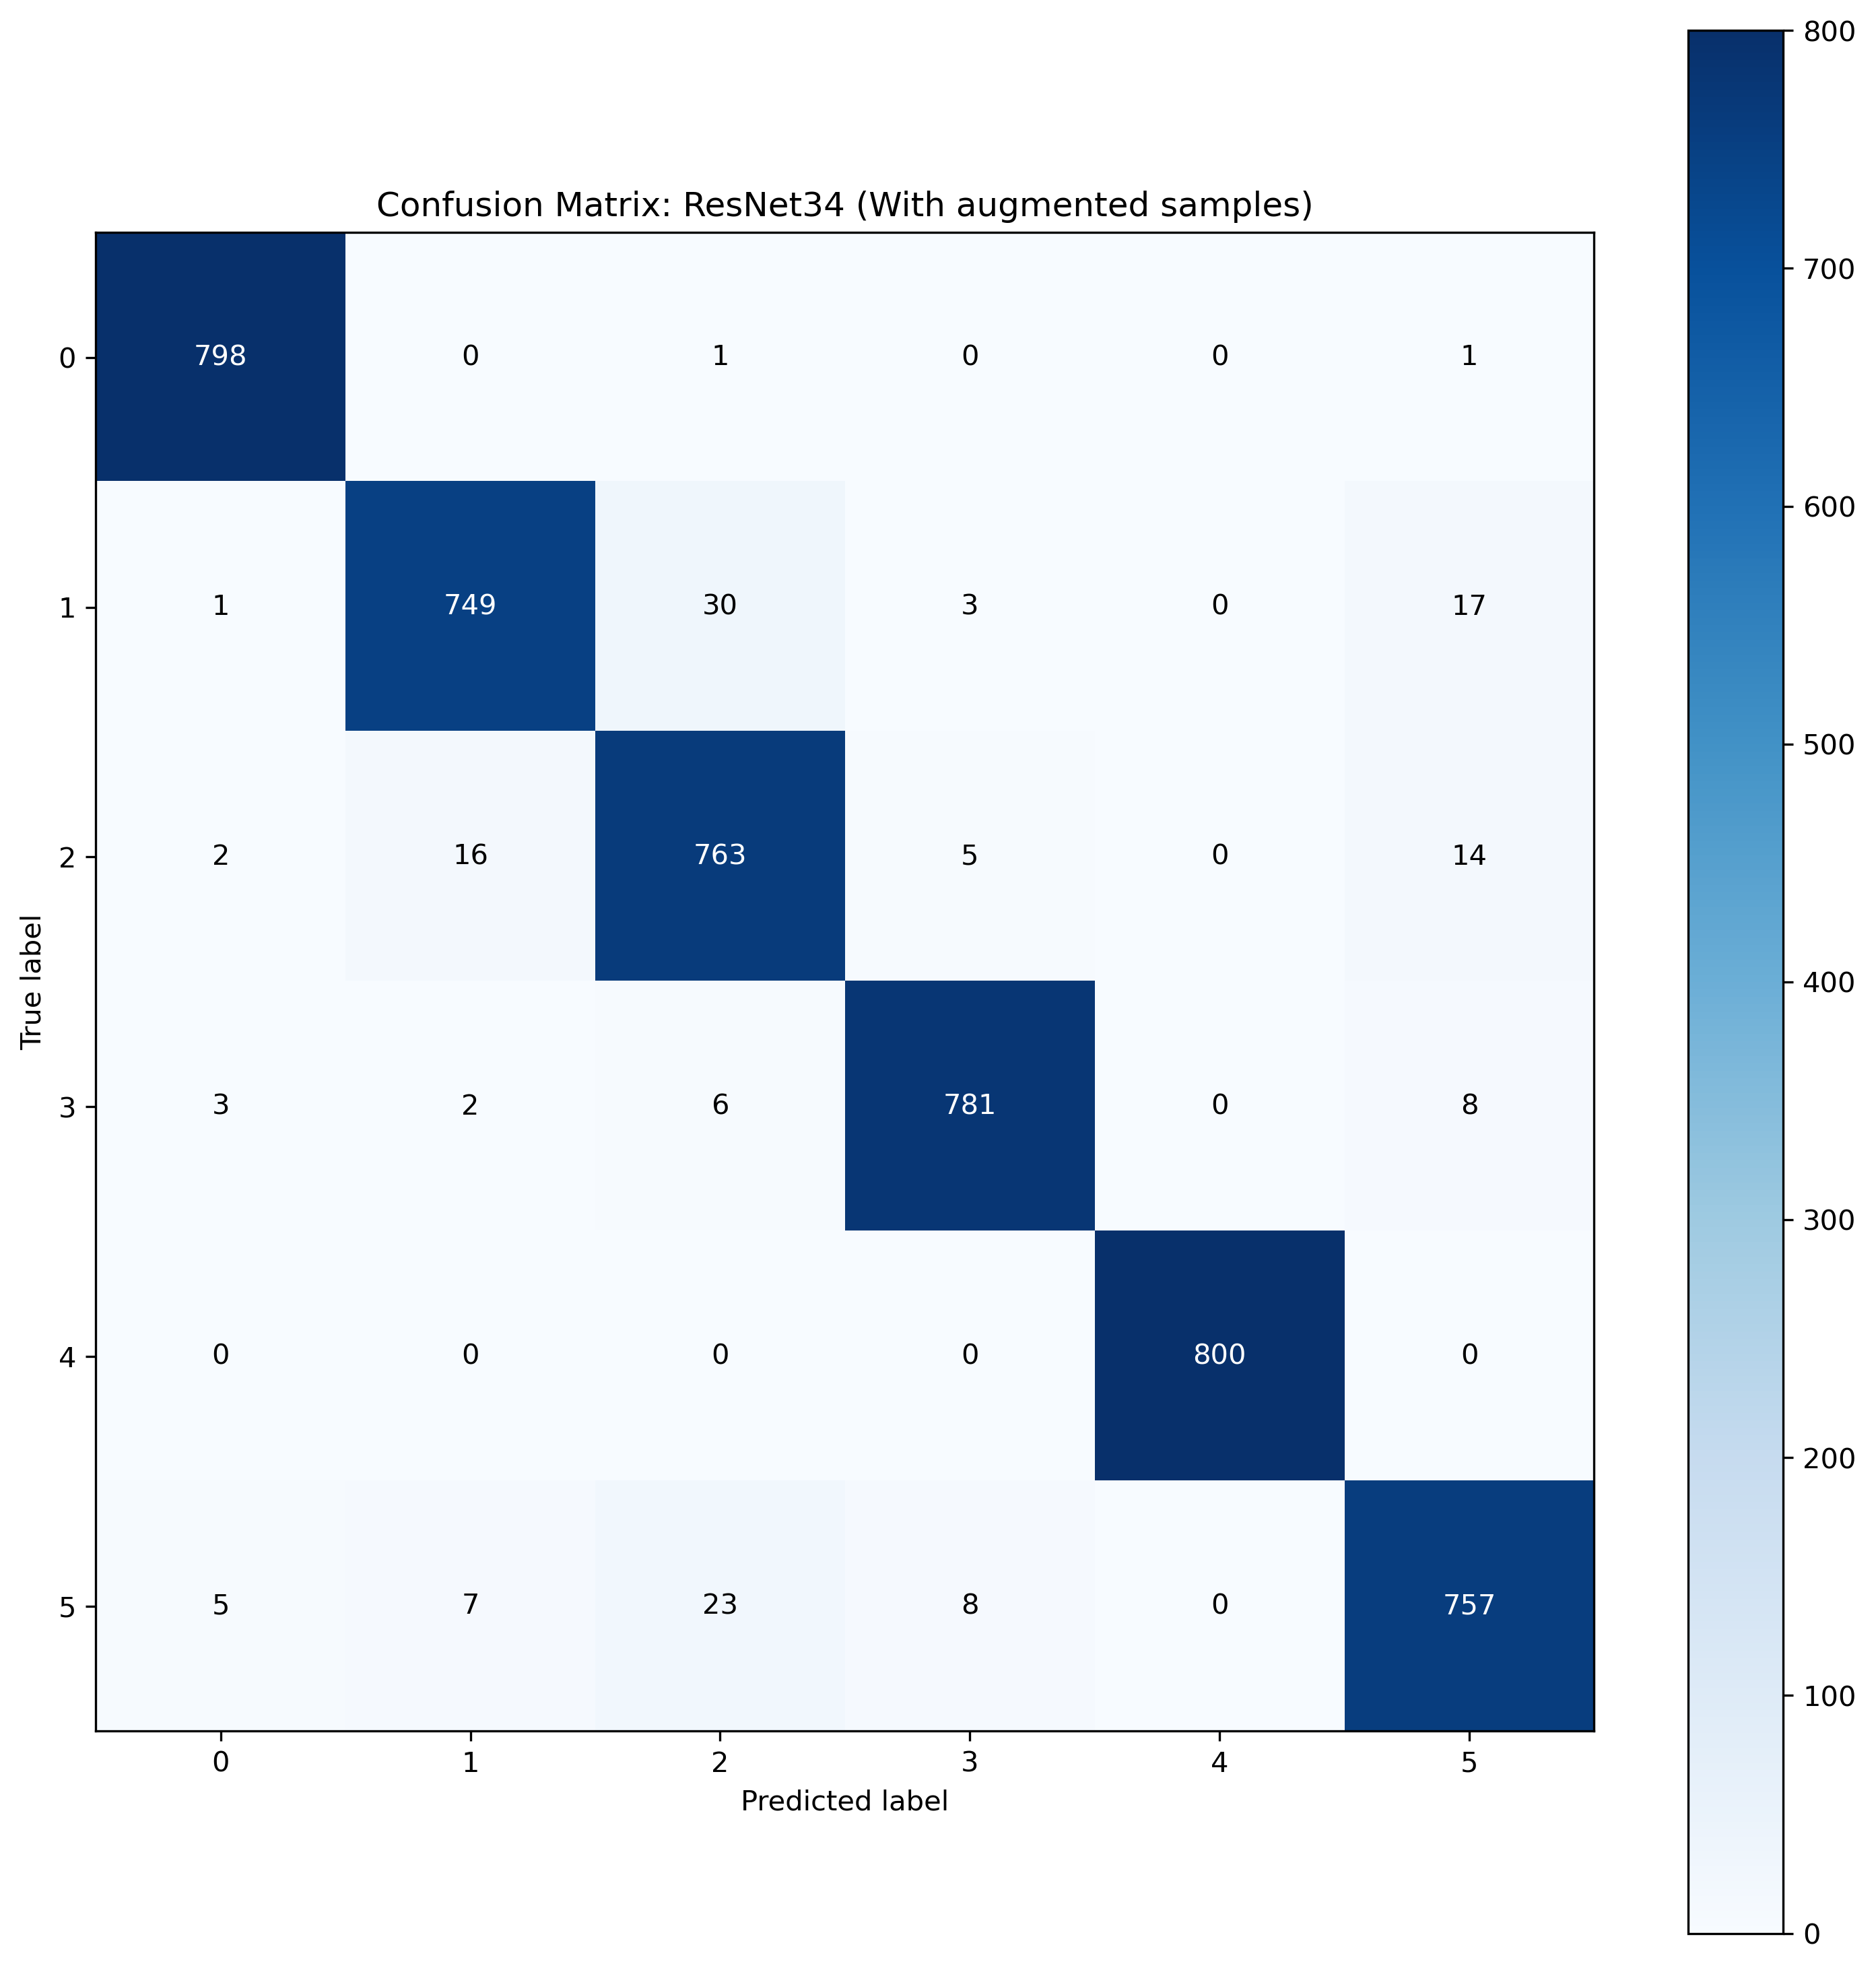

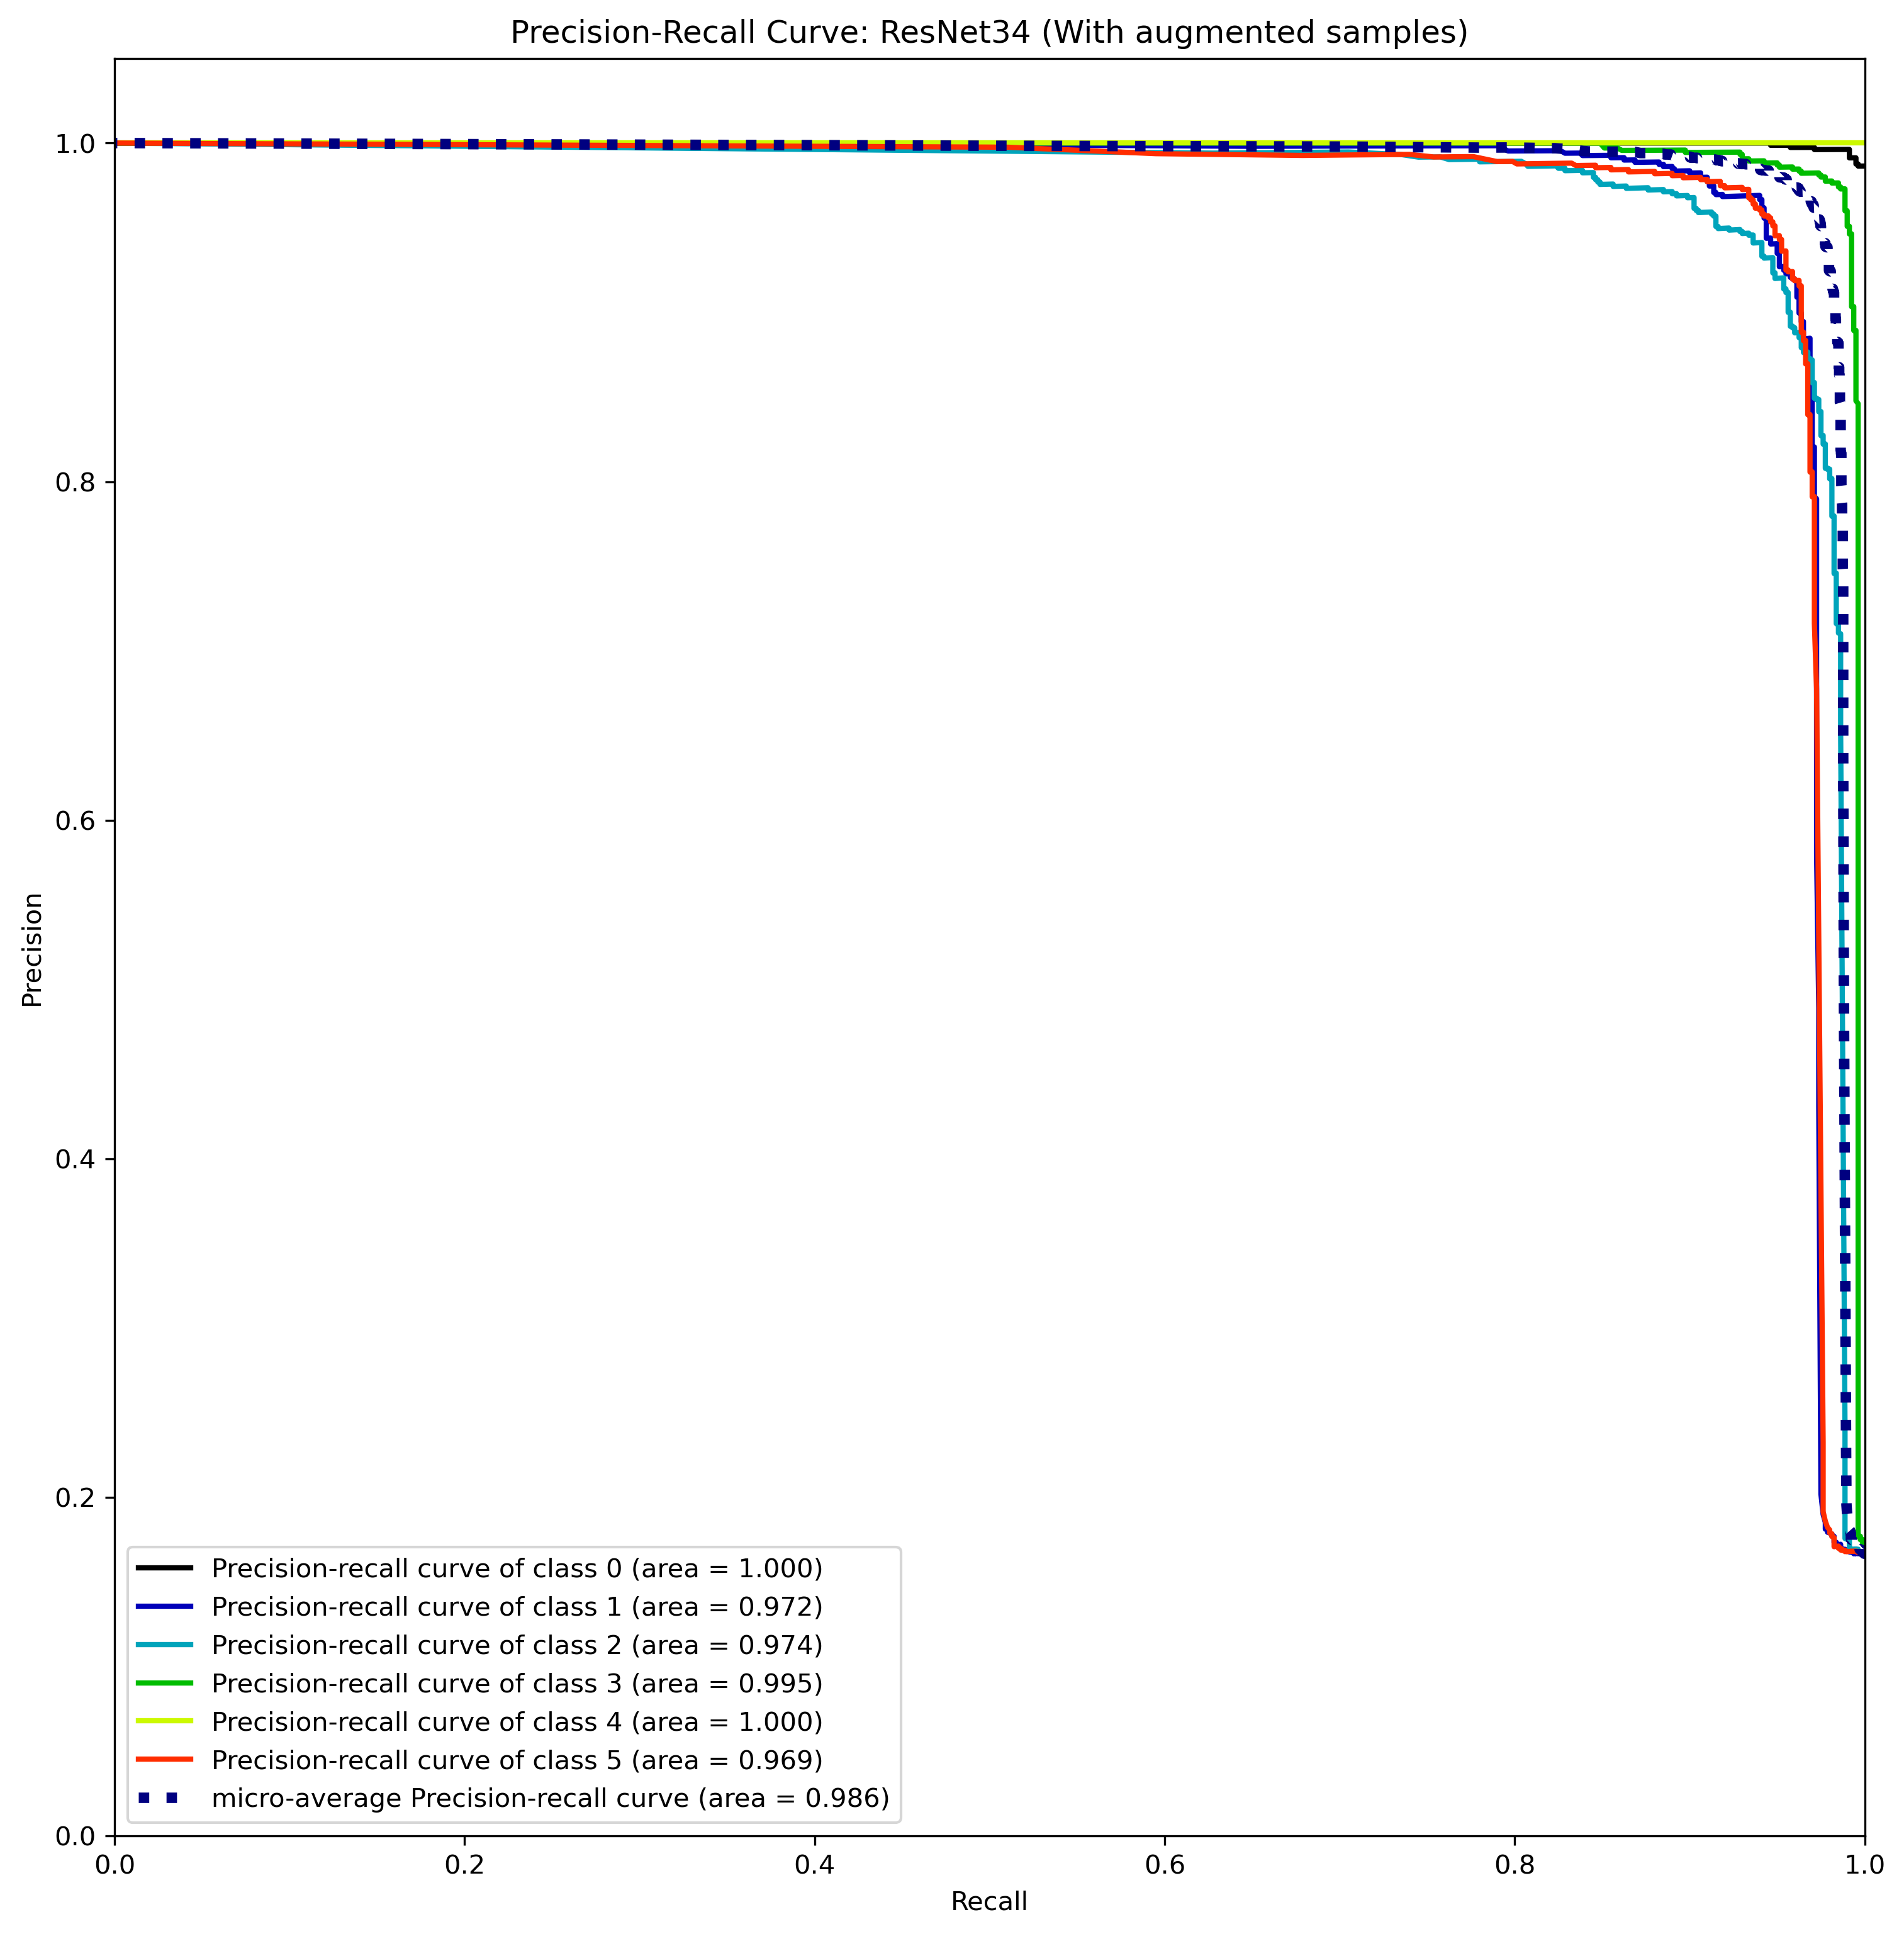

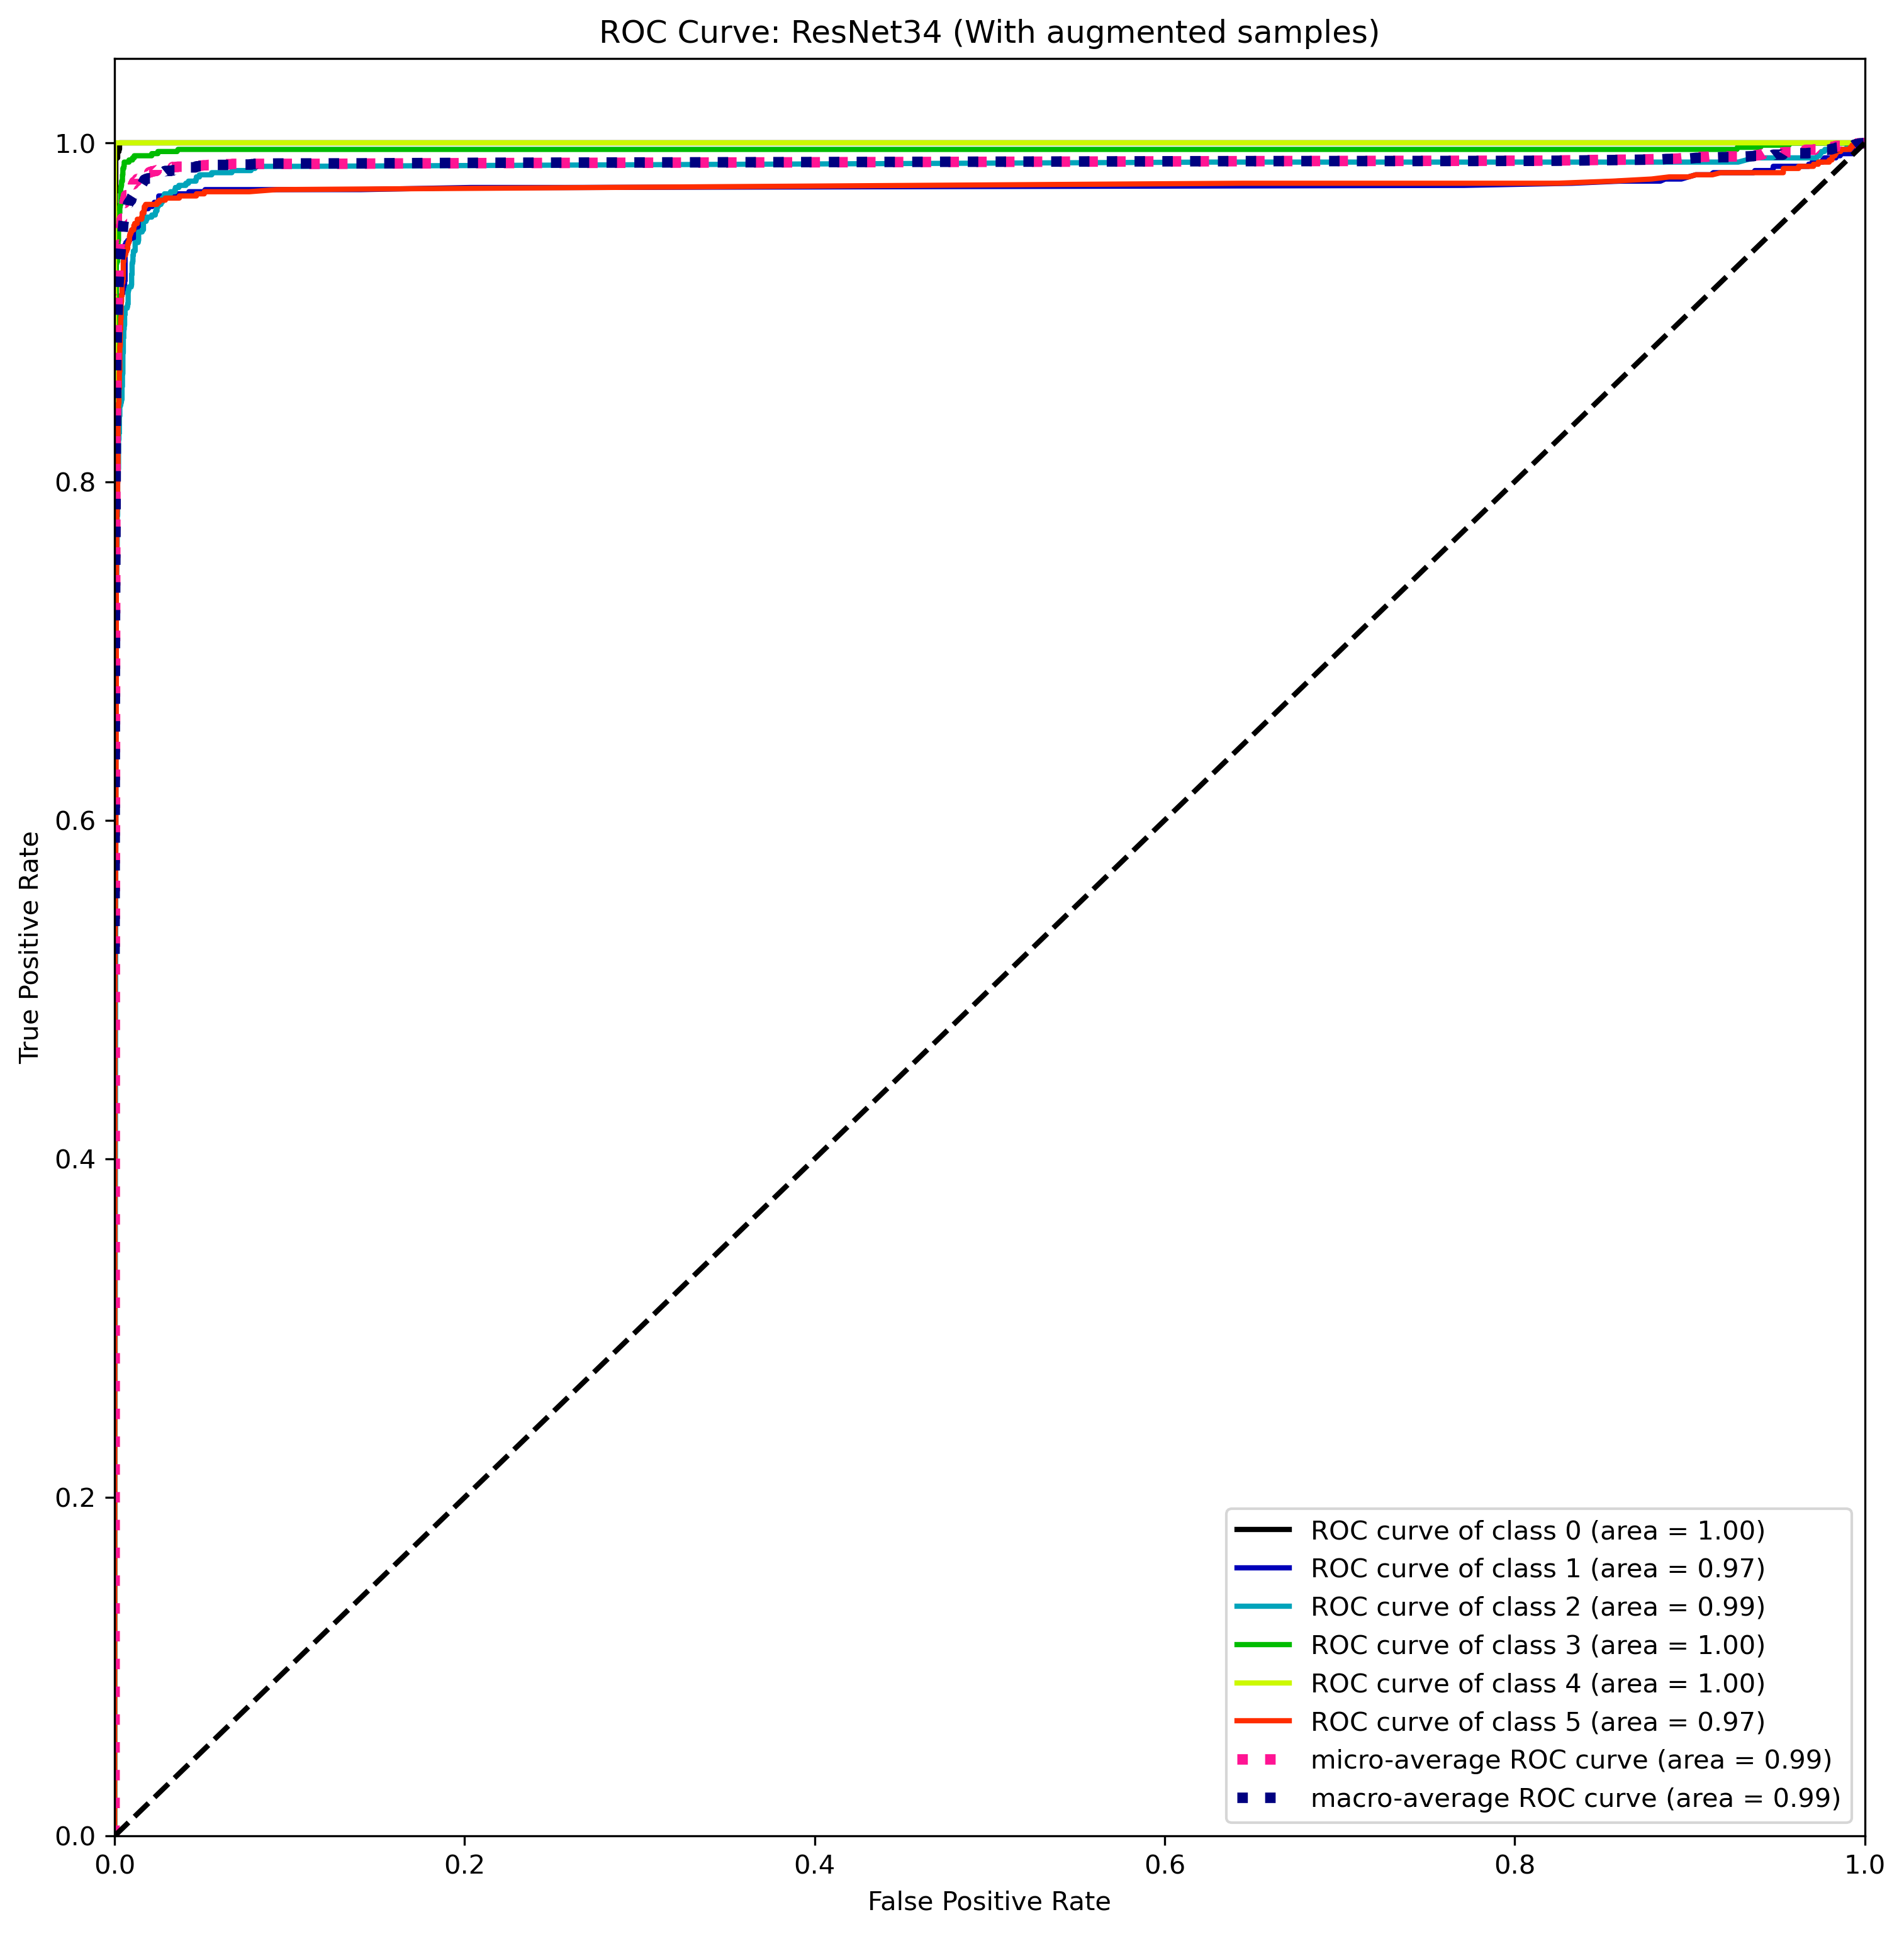

In [7]:
fig_save_path = str(ROOT.joinpath("results", "resnet34", "with_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="ResNet34 (With augmented samples)",
    save_path=fig_save_path
)